<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1. Загрузить датасет** 
* Time: Количество секунд, прошедших между этой транзакцией и первой транзакцией в базе данных
* Amount: Сумма сделки
* Class: 1 для мошеннических транзакций, 0 в противном случае

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
print('Количество отсутствующих значений в Dataset:', sum(dataset.isnull().sum()))

Количество отсутствующих значений в Dataset: 0


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

No handles with labels found to put in legend.


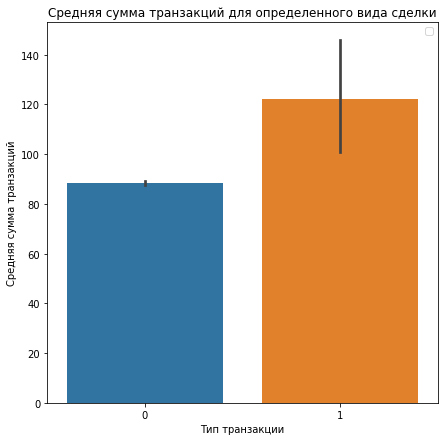

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x=dataset['Class'], y=dataset['Amount'])
plt.xlabel('Тип транзакции')
plt.ylabel('Средняя сумма транзакций')
plt.title('Средняя сумма транзакций для определенного вида сделки')
plt.legend()
plt.show()

In [5]:
print('Всего сделок: ', len(dataset['Class']))
print('Количество обманных сделок:', len(dataset[dataset['Class'] == 1]))
print('Количество честных сделок:', len(dataset[dataset['Class'] == 0]))

Всего сделок:  284807
Количество обманных сделок: 492
Количество честных сделок: 284315


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

Денег было использовано в обманных операциях: 60128
Денег было использовано в нормальных операциях: 25102462


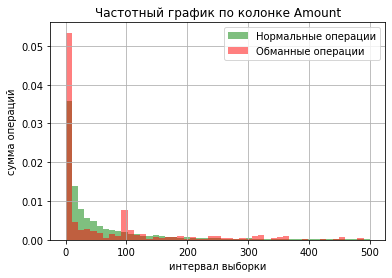

In [6]:
import numpy as np
amount_frod_operation = dataset[dataset['Class'] == 1]['Amount']
amount_norm_operation = dataset[dataset['Class'] == 0]['Amount']
print('Денег было использовано в обманных операциях:', round(sum(amount_frod_operation)))
print('Денег было использовано в нормальных операциях:', round(sum(amount_norm_operation)))

bins = np.linspace(0, 500, 50)
x = amount_norm_operation
y = amount_frod_operation

plt.hist(x, bins, 80, alpha=0.5, density=True, color='g')
plt.hist(y, bins, 80, alpha=0.5, density=True, color='r')
plt.xlabel('интервал выборки')
plt.ylabel('сумма операций')
plt.title('Частотный график по колонке Amount')
plt.legend(['Нормальные операции', 'Обманные операции'])
plt.grid(True)
plt.rcParams['figure.figsize']=7,7
plt.show()

**5. Построить графики histograms для всех значений**

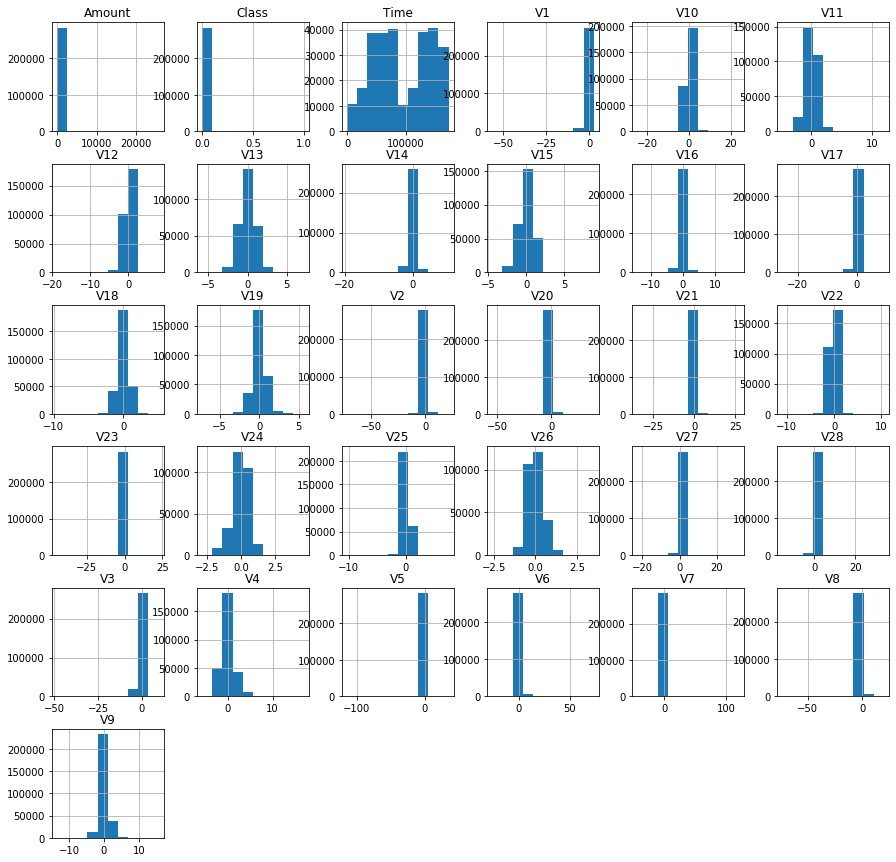

In [7]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

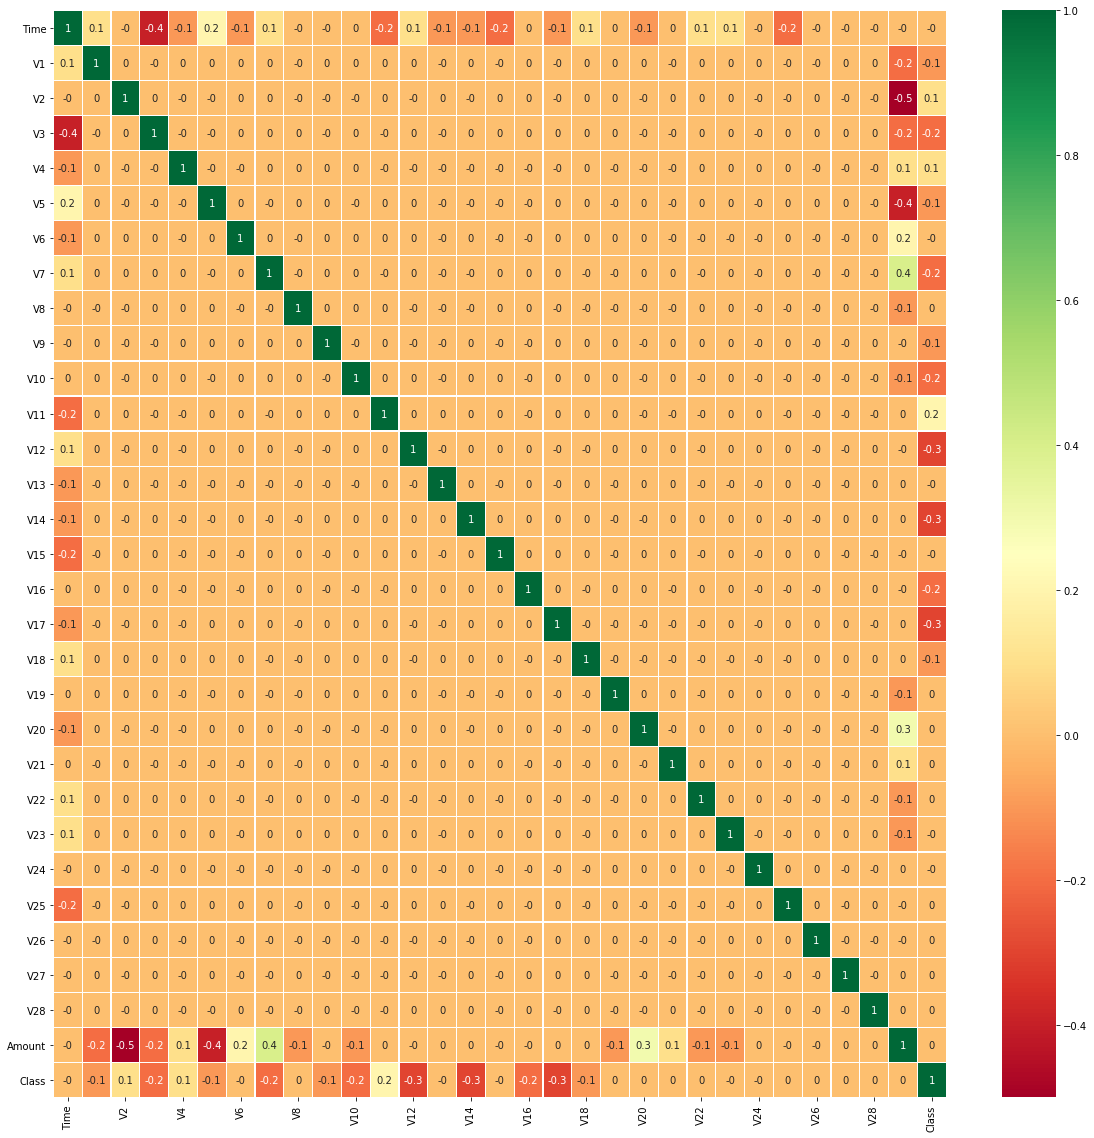

In [9]:
sns.heatmap(np.round_(dataset.corr(), decimals=1),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(20,20)
plt.show()

Сильной линейной корреляции между переменными нет, но есть значения 0.4 для V7 и Amount (то есть при увеличении V7 увеличивается сумма транзакции), значение -0.5 для V2 и Amount (то есть при увеличении V2 сумма транзакции уменьшается).

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Первые 30 колонок данной таблицы являются колонками для предсказания типа операции. 31 колонка является атрибутом, который будем прелсказывать.

In [11]:
output_y = dataset.iloc[:,30:]
input_x = dataset.iloc[:,:30]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3)

Модель Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,np.ravel(y_train))

RandomForestClassifier()

Как делать classification report:

In [35]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85280
           1       0.94      0.81      0.87       163

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



0.9995435553526912

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [36]:
#Нормализуем данные
from sklearn import preprocessing
dataset_sings = dataset.iloc[:,:30] 
headers = list(dataset_sings.columns.values)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(dataset_sings)
dataset_norm = pd.DataFrame(np_scaled)
dataset_norm.columns = headers
dataset_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [37]:
output_y_norm = dataset.iloc[:,30:]
input_x_norm = dataset_norm
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(input_x_norm, output_y_norm, test_size=0.3)

In [38]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_1,np.ravel(y_train_1))

RandomForestClassifier()

In [23]:
from sklearn.metrics import classification_report
model_pred_1 = model.predict(X_test_1)

print(classification_report(y_test_1, model_pred_1))

model.score(X_test_1, y_test_1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.79      0.85       148

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9995201479348805

Модель "рандомных деревьев" для исходных и нормированных данных дала точность предсказания порядка 100%. Метрика Precision для красса 2 была 94%, стала 92%. Метрика Recall для первого класса была 81% на исходных данных и стала 79% на нормированных. Значение f1-score тоже немного уменьшилось. **Таким образом, необязательно было нормализавать данные для модели RandomForest. Модель RandomForest не требует предворительной нормализации данных.**

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [39]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(input_x_norm,
                                                 output_y_norm,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train_2, y_train_2)
X_resampled, y_resampled = ros.fit_sample(X_train_2, y_train_2)
print('Количество элементов до операции:', len(X_train_2))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398048


In [44]:
unique, counts = np.unique(y_train_2, return_counts=True)
print('Было:', dict(zip(unique, counts)))
unique1, counts1 = np.unique(y_resampled, return_counts=True)
print('Стало:',dict(zip(unique1, counts1)))

Было: {0: 199024, 1: 340}
Стало: {0: 199024, 1: 199024}
